<a href="https://colab.research.google.com/github/omshreya-s/URV/blob/main/URV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np

# Removing Noise

In [5]:
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

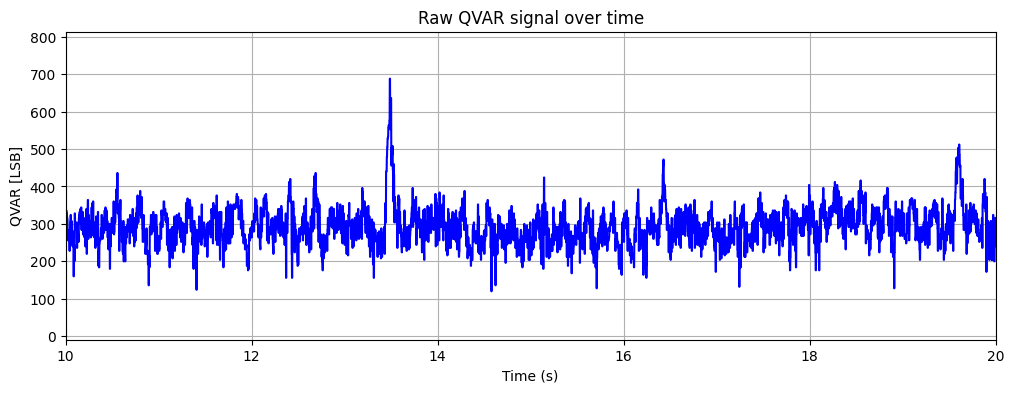

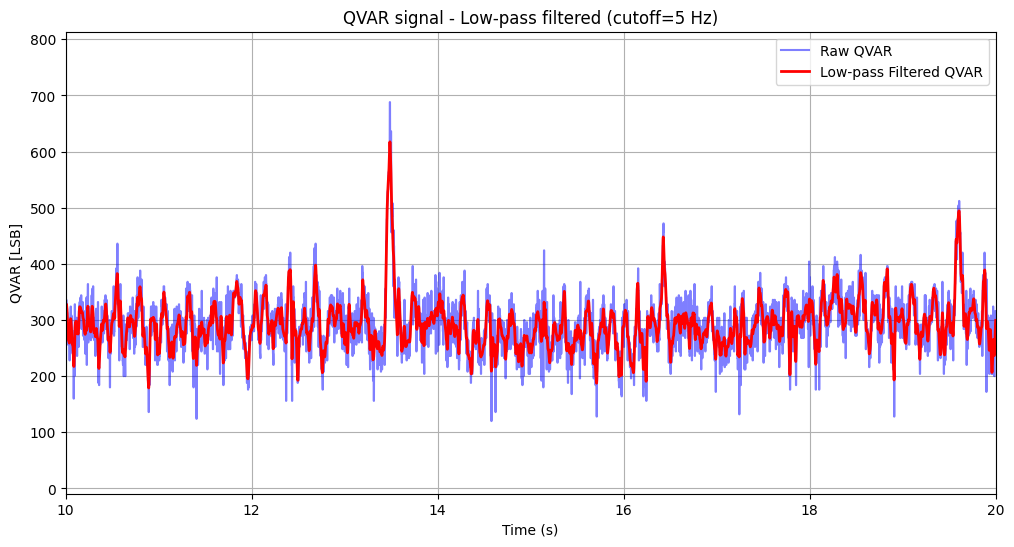

In [6]:
#change file here
file = "data/user_ank_rain_d1_class_000.txt"

df = pd.read_csv(file, sep="\t")
df = df.iloc[:, :-1]
df['Timestamp_sec'] = df['Timestamp [us]'] / 1e6
df.head() #show the basic data construction

#how many seconds are plotted
xlim_lower = 10
xlim_upper = 20

#raw QVAR image
plt.figure(figsize=(12, 4))
plt.plot(df['Timestamp_sec'], df['QVAR [LSB]'], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("QVAR [LSB]")
plt.title("Raw QVAR signal over time")
plt.xlim(xlim_lower, xlim_upper)
plt.grid(True)
plt.show()

#low-pass filtered QVAR image

#parameter setting
fs = 120
cutoff = 5
order = 2

# take QVAR and time
time_sec = df['Timestamp_sec']
qvar = df['QVAR [LSB]']

df['qvar_filtered'] = butter_lowpass_filter(qvar, cutoff, fs, order)
plt.figure(figsize=(12, 6))
plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
plt.plot(time_sec, df['qvar_filtered'], label='Low-pass Filtered QVAR', color='red', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("QVAR [LSB]")
plt.title(f"QVAR signal - Low-pass filtered (cutoff={cutoff} Hz)")
plt.xlim(xlim_lower, xlim_upper)
plt.legend()
plt.grid(True)
plt.show()

df.to_csv(os.path.basename(file), index=False)
